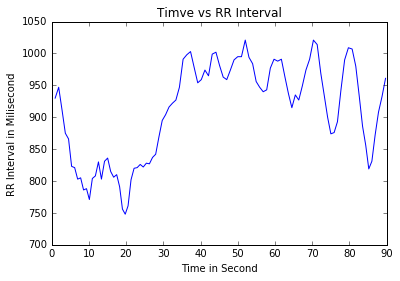

In [1]:
#setting
import matplotlib.pyplot as plt
import urllib2
%matplotlib inline    
beginT = 0
endT = 90

#legacy code; for reading hrm from local file
# #obtain the hrm file
# print('Mission begin\n')
# f = open('rr3.hrm', 'r')
# rrSection = f.read().split(']')[-1]


#obtain the hrm file; get it from online
url = 'http://bliss.calit2.net/analysis/device_data/61ad8e31b42aaa4f18cd2495195d11d5.hrm'
response = urllib2.urlopen(url)
data = response.read()
text = data.decode('utf-8')
rrSection = text.split(']')[-1]
rrList = rrSection.split('\r\n')
#get rid of header
rrList = rrList[1:]
#get rid of the last three sentinel values '3999'
rrList = rrList[0:len(rrList)-3]

#construct time array from the rr intervals
tList = list()
#data is in milisecond, divide to get sec
tList.append(int(rrList[0])/1000.0)
for i in range(1, len(rrList)):
    tList.append(tList[-1] + int(rrList[i])/1000.0)
if tList[-1]<endT:
    endT=tList[-1]

#limit the time interval
beginIndex = 0
endIndex = 0
i = 0
while tList[i]<beginT:
    i+=1
beginIndex = i
while tList[i]<endT:
    i+=1
endIndex = i
tList = tList[beginIndex: endIndex]
rrList = rrList[beginIndex: endIndex]
    

#plotting the graph
plt.plot(tList, rrList)
plt.xlabel('Time in Second')
plt.ylabel('RR Interval in Milisecond')
plt.title('Timve vs RR Interval')
plt.show()

In [ ]:
FFMPEG_BIN = "ffmpeg" # on Linux ans Mac OS
import os
import subprocess as sp
import numpy


command = [FFMPEG_BIN,'-i', '556.mp4', '-']
pipe = sp.Popen(command, stdout=sp.PIPE, stderr=sp.PIPE)
pipe.stdout.readline()
pipe.terminate()
infos = pipe.stderr.read()
print infos